zelim:
- pie chartove kao u zadaci
- za svaku kategoriju srece usporedbu demografije 
- usporedba pojedine kategorije srece po dobnim skupinama - stupcasti usporedni graf
- "konzistentnost" po spolovima: kako se kategorije srece mijenjaju od kratkorocnih do dugorocnih happy momenata, podijeljeno po spolovima
- mozda neki pearsonov koeficijent korelacije? IMA PY FJA ZA TO : numpy.corrcoef();


# *Happy moments*

Tim znanstvenika *crowdfundingom* je skupio oko 100,000 podataka o tome što je ispitanike učinilo sretnima u danom trenutku. Pitanja su se odnosila ili na kratkoročnu sreću - pri čemu su bili upitani što ih je usrećilo u posljednja 24 sata, ili na dugoročniju - pitalo ih se što ih je usrećilo unazad tri mjeseca.

Pri ispunjavanju upitnika, svaki je ispitanik dao svoje opće demografske podatke (dob, porijeklo, jesu li vjenčani, jesu li roditelji) i kratku rečenicu koja odgovara na pitanje o sretnim trenutcima u proteklom danu, odnosno protekla tri mjeseca. Zatim su ispitivači, kao što je opisano u [njihovom znanstvenom radu](https://arxiv.org/pdf/1801.07746.pdf), *ekstrahirali* što se čini kao neka općenita *kategorija* uzroka sreće.

## Uvoz podataka

Za početak, učitajmo rezultate upitnika kako bismo s njima mogli raditi. 

In [1]:
import pandas as pd

Jedna od tablica sadrži podatke o sretnim trenutcima, te procijenjene kategorije uzroka sreće:

In [2]:
sreca = pd.read_csv('cleaned_hm.csv', encoding='utf-8')
sreca

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding


Druga tablica sadrži demografske podatke o ispitanicima:

In [3]:
osobe = pd.read_csv('demographic.csv', encoding='utf-8')
osobe

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


U tablici `sreca` imamo nekoliko stupaca s podacima koji nam neće biti potrebni za analizu podataka. Stoga ih možemo jednostavno obrisati:

In [4]:
del sreca['original_hm'], sreca['modified'], sreca['num_sentence'], sreca['ground_truth_category']

## Analiza podataka

Pokušajmo sada iz ovih podataka donijeti neke zaključke. Kako bismo znali točno s kojim kategorijama uzroka sreće raspolažemo, ispišimo ih:

In [5]:
kategorije = set(sreca['predicted_category'])
kategorije

{'achievement',
 'affection',
 'bonding',
 'enjoy_the_moment',
 'exercise',
 'leisure',
 'nature'}

#### Kružni dijagrami

Za početak, bilo bi zanimljivo vidjeti kako su raspoređene kategorije uzroka sreće kad se radi o "kratkoročnoj" sreći, u odnosu na kategorije kad se radi o "dugoročnoj" sreći. Pogledajmo kružne dijagrame koji će nam pomoći pritom.

Prvo nam trebaju podokviri koji prikazuju brojeve ispitanika prema kategoriji uzroka sreće.

In [21]:
kratkorocni_razlozi = pd.DataFrame((sreca[sreca['reflection_period'] == '24h'])
                                    ['predicted_category'].value_counts())

dugorocni_razlozi = pd.DataFrame((sreca[sreca['reflection_period'] == '3m'])
                                 ['predicted_category'].value_counts())

Nacrtajmo *pie chart*-ove.

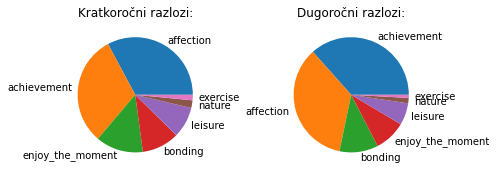

In [18]:
from matplotlib import pyplot as plt

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5])
ax1.pie(x = kratkorocni_razlozi['predicted_category'],
       labels = kratkorocni_razlozi.index)
ax1.set_title("Kratkoročni razlozi:")

ax2 = fig.add_axes([.5, 0, .5, .5])
ax2.pie(x = dugorocni_razlozi['predicted_category'],
       labels = dugorocni_razlozi.index)
ax2.set_title("Dugoročni razlozi:")

plt.show()

#### Kutijasti dijagrami

Pokušajmo usporediti demografske podatke ispitanika koji su izrazili pojedine kategorije uzroka sreće. Primjerice, možemo izraditi *boxplot* dijagrame za razdiobu dobi ispitanika koji su u posljednja 24 sata osjetili sreću u kategorijama *affection* i *achievement*, kao i iste takve dijagrame kad se radi o sreći u posljednja 3 mjeseca.

Kako bismo lakše načinili `DataFrame` koji ćemo prikazati *boxplot*-om, a koji treba sadržavati podatke iz tablica `sreca` i `osobe`, možemo prvo spojiti te tablice. Spajamo ih po identifikatoru ispitanika `wid`.

In [22]:
svi_podaci = pd.merge(sreca, osobe, on = 'wid')
svi_podaci

,hmid,wid,reflection_period,cleaned_hm,predicted_category,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,affection,35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,leisure,35,USA,m,single,n
2,28073,2053,24h,I listened to some music and heard an entire a...,leisure,35,USA,m,single,n
3,33522,2053,24h,Went to see a movie with my friend,bonding,35,USA,m,single,n
4,34522,2053,24h,"Played guitar, learning a song on it",leisure,35,USA,m,single,n
...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,24h,Was told I was a great employee by my boss.,achievement,32,USA,m,married,n
100531,128751,11402,24h,Fixed my car.,achievement,32,USA,m,married,n
100532,127759,11050,24h,Four year back I lost my job. Now I am living ...,achievement,65,IND,m,married,y
100533,128259,11050,24h,Yesterday evening I received a call from unkno...,bonding,65,IND,m,married,y


In [52]:
kratko_affection = pd.DataFrame(svi_podaci[
    (svi_podaci['predicted_category'] == 'affection') 
    & 
    (svi_podaci['reflection_period'] == '24h')
    &
    ((type(svi_podaci['age']) == 'float') | (type(svi_podaci['age']) == 'integer'))]);
#plt.boxplot(list(kratko_affection['age']));
kratko_affection['age']

Series([], Name: age, dtype: object)

could not convert string to float: 'prefer not to say'


treba filtrirati podatke da se izbaci bilo šta što nije broj!!!

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

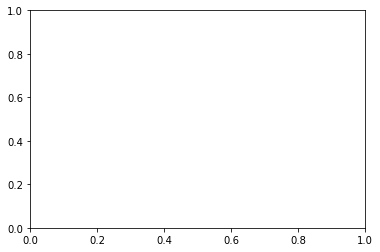

In [53]:
kutija1 = kratko_affection.boxplot(column = 'age')

In [38]:
kratko_affection.columns

Index(['hmid', 'wid', 'reflection_period', 'cleaned_hm', 'predicted_category',
       'age', 'country', 'gender', 'marital', 'parenthood'],
      dtype='object')

In [46]:
type(5) == 'float'

False

In [47]:
float('a')

ValueError: could not convert string to float: 'a'